#**Bootcamp IGTI: Programador de Software Iniciante**
#**Desafio Final**
---
##**Atividades**
O aluno deverá desenvolver um sistema para controle de folha de pagamento de funcionários de uma empresa. O programa deverá fornecer um menu de interação pelo terminal ao usuário, com as seguintes opções:
1.   Cadastrar funcionário.
2.   Imprimir contracheque.
 
Na opção 1, o programa deverá pedir ao usuário que digite o nome e o salário bruto do funcionário. Esse funcionário deve ser armazenado em uma lista. O local de armazenamento fica a critério do aluno, podendo ser em memória ou em arquivo por exemplo.

Na opção 2 o programa deverá perguntar ao usuário qual o índice do funcionário que ele deseja imprimir o contracheque. Lembrando que nas listas o primeiro registro corresponde ao índice 0.

Após o usuário digitar o índice, o programa deverá realizar os cálculos abaixo para informar ao funcionário os descontos que ele terá no seu salário. Para simplificar, o programa deverá calcular somente o desconto do INSS e do IRRF, sem considerar variáveis adicionais, como por exemplo número de dependentes.
Primeiro é feito o cálculo do desconto INSS. Ele é feito de forma progressiva de acordo a faixa salarial, considerando a tabela abaixo.

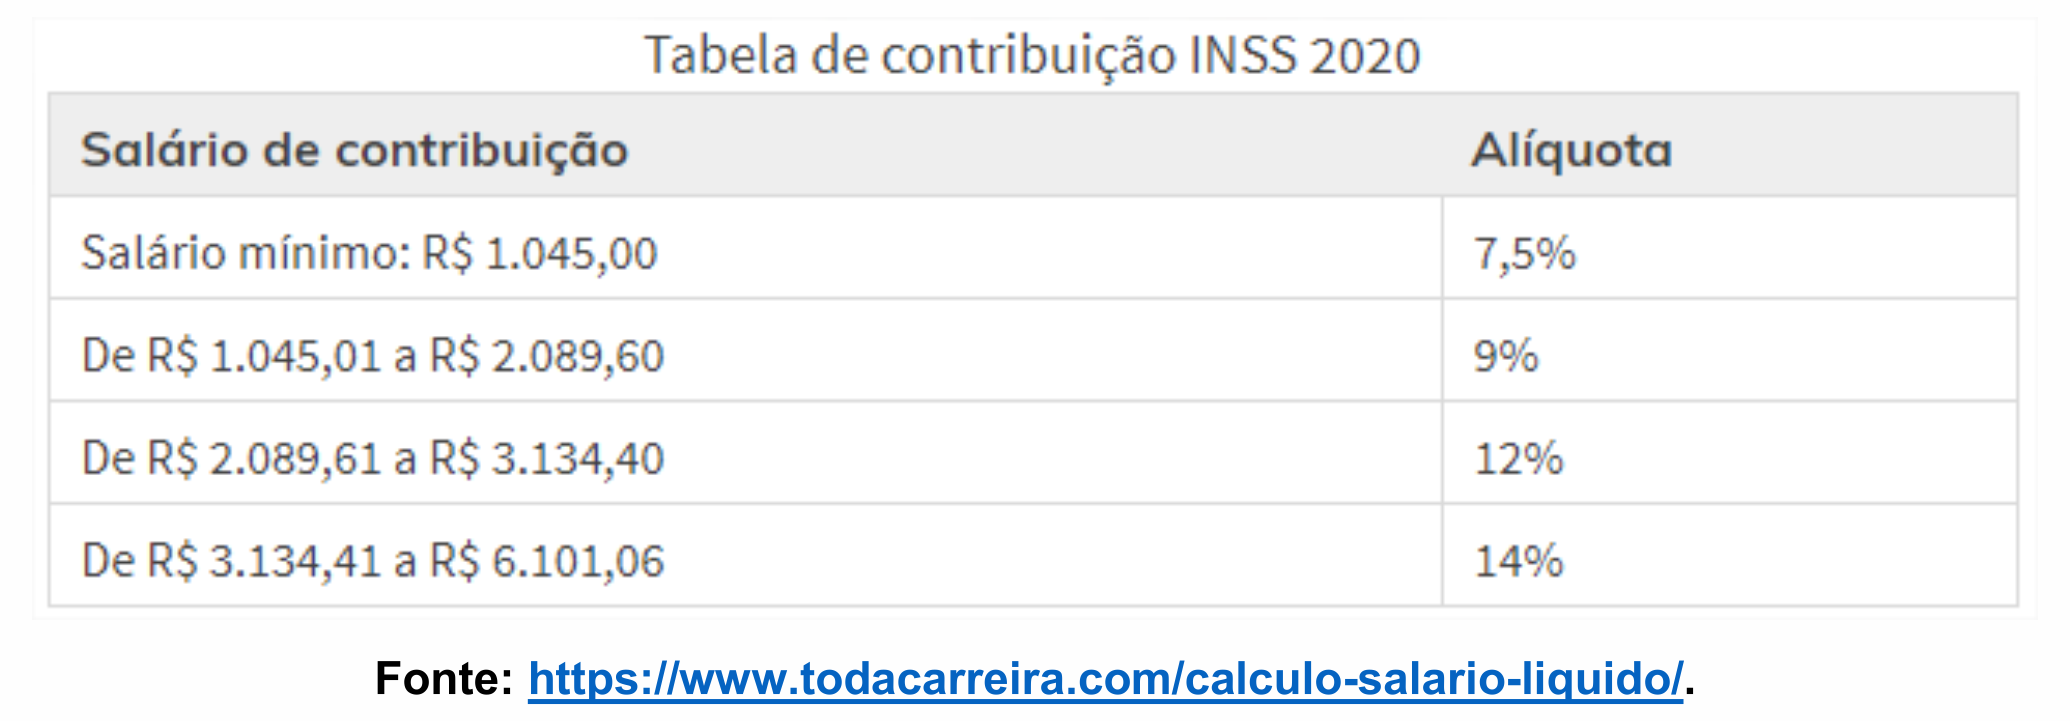

Para salários acima de R\$6.101,06, o desconto é fixado em R\$713,10.


O cálculo do desconto do IRRF segue a tabela da imagem abaixo. O valor utilizado para cálculo deve ser o valor do salário bruto menos o valor do desconto de INSS. Para o IRRF, o cálculo é mais simples que no INSS, pois ele não é feito de forma progressiva. Basta verificar em qual faixa o valor se encaixa, descontar a percentual alíquota e depois a parcela dedutível.


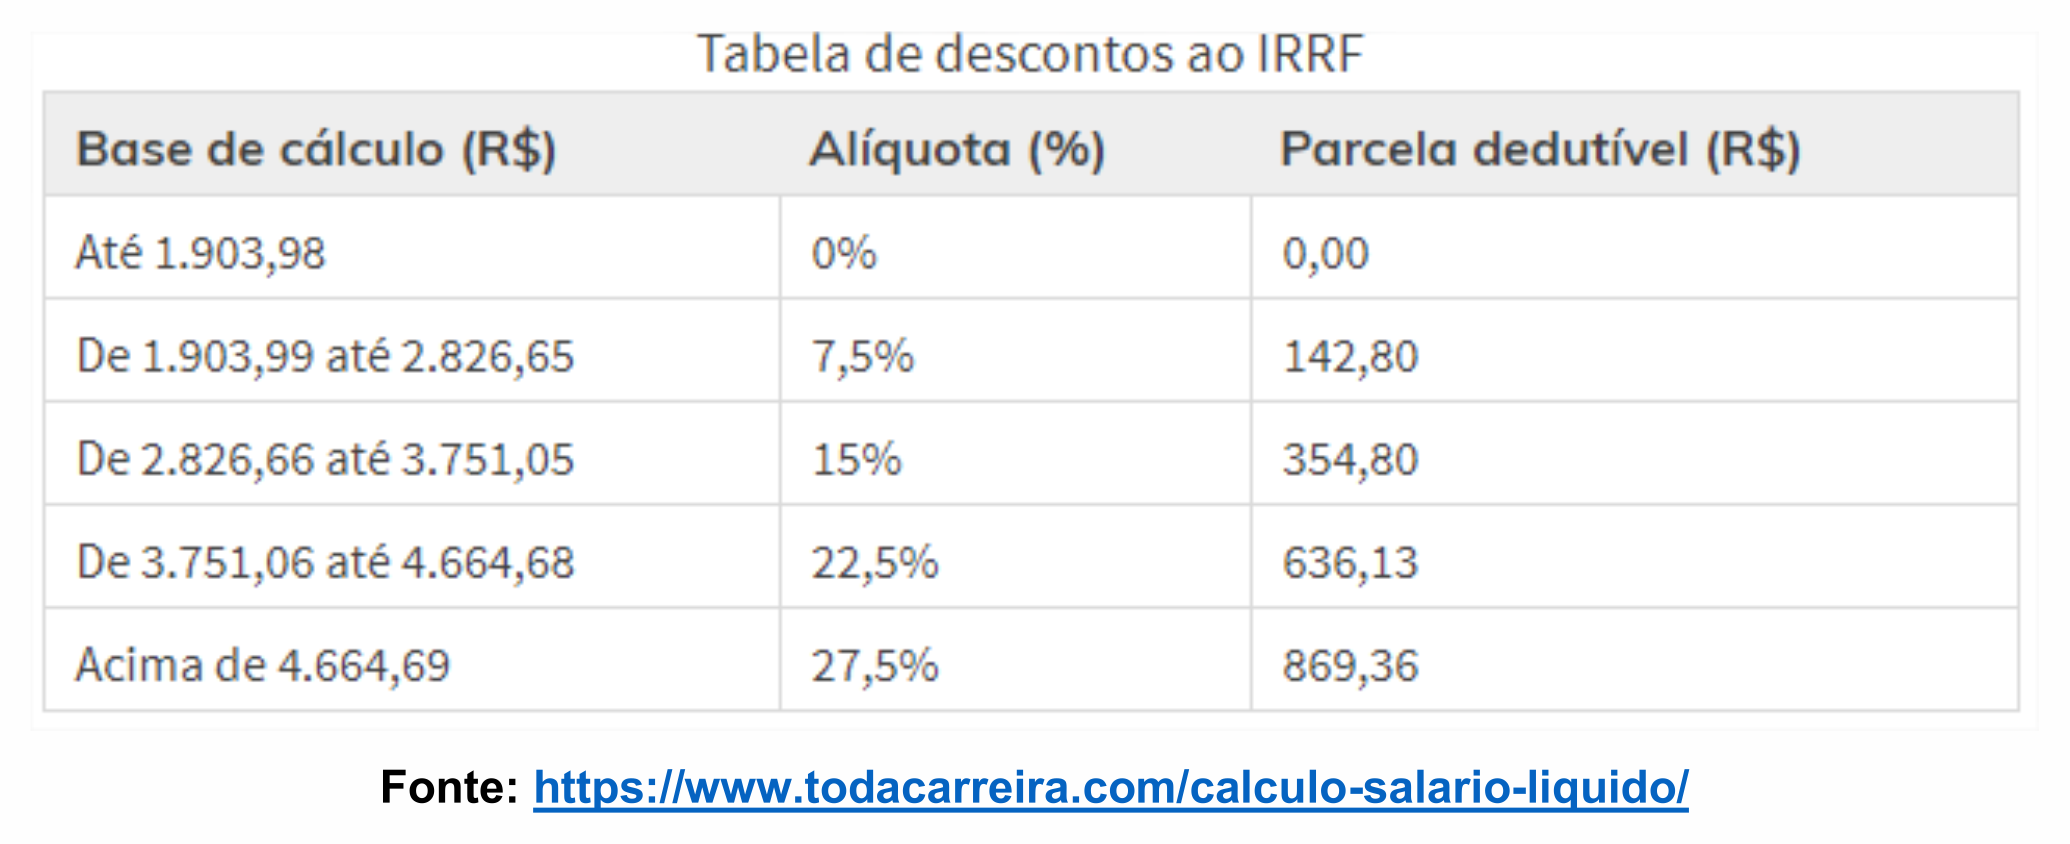


In [ ]:
# Funções Auxiliares
def mostra_menu() :
    print('=========== Menu Principal ==========')
    print('1- Cadastrar funcionário')
    print('2- Imprimir contracheque')
    print('3- Sair')
    print('=====================================')
    return input('Digite a opção desejada: ')

def cadastra_funcionario() :
    nome = input('Digite o nome do funcionario: ')
    salario = float(input('Digite o salário bruto do funcionario: '))
    lista_funcionarios.append({
        'nome': nome, 
        'salario_bruto': salario})
    

def imprime_contracheque() :
    print('==== Lista de Funcionários ====')
    for i,funcionario in enumerate(lista_funcionarios):
        print(f"{i}- {funcionario['nome']}")
    print('===============================')
    informacao = input('Digite o índice do funcionario: ')
    while (not informacao.isdigit()) :
        informacao = input('O indice deve ser um número. Digite novamente. ')
    indice = int(informacao)
    funcionario = lista_funcionarios[indice]
    inss = calcula_inss(funcionario['salario_bruto'])
    irrf = calcula_irrf(funcionario['salario_bruto'] - inss)
    salario_liquido = funcionario['salario_bruto'] - inss - irrf
    print('===============================')
    print('======== CONTRA CHEQUE ========')
    print('===============================')
    print(f"-Funcionário: {funcionario['nome']}")
    print(f"-Salário Bruto: {funcionario['salario_bruto']:.2f}")
    print(f"-Desconto INSS: {inss:.2f}")
    print(f"-Desconto IRRF: {irrf:.2f}")
    print(f"-Salário Líquido: {salario_liquido:.2f}")

def calcula_inss(salario) :
    inss = 0;
    if (salario > 6101.06) :
        return 713.10
    if (salario > 3134.40) :
        inss += (salario - 3134.40) * 0.14
        salario = 3134.40
    if (salario > 2089.60) :
        inss += (salario - 2089.60) * 0.12
        salario = 2089.60
    if (salario > 1045.00) :
        inss += (salario - 1045.00) * 0.09
        salario = 1045.00
    inss += salario * 0.075
    return inss

def calcula_irrf(salarioComDesconto) :
    if (salarioComDesconto < 1903.99) :
        return 0
    if (salarioComDesconto < 2826.66) :
        return (salarioComDesconto * 0.075) - 142.80
    if (salarioComDesconto < 3751.06) :
        return (salarioComDesconto * 0.15) - 354.80
    if (salarioComDesconto < 4664.69) :
        return (salarioComDesconto * 0.225) - 636.13
    return (salarioComDesconto * 0.275) - 869.36


# Programa Principal
lista_funcionarios = [];
opcao = 0

while (opcao != '3') :
    opcao = mostra_menu()
    if (opcao == '1') :
        cadastra_funcionario()
    elif (opcao == '2'):
        imprime_contracheque()
    elif (opcao == '3'):
        print('======== Programa encerrado. ========')
        break
    else:
        print('Opção inválida.')

=========== Menu Principal ==========
1- Cadastrar funcionário
2- Imprimir contracheque
3- Sair
Digite a opção desejada: 1
Digite o nome do funcionario: jose
Digite o salário bruto do funcionario: 1500
=========== Menu Principal ==========
1- Cadastrar funcionário
2- Imprimir contracheque
3- Sair
Digite a opção desejada: 2
==== Lista de Funcionários ====
0- jose
Digite o índice do funcionario: 0
======== CONTRA CHEQUE ========
-Funcionário: jose
-Salário Bruto: 1500.00
-Desconto INSS: 119.32
-Desconto IRRF: 0.00
-Salário Líquido: 1380.67
=========== Menu Principal ==========
1- Cadastrar funcionário
2- Imprimir contracheque
3- Sair
Digite a opção desejada: 3
======== Programa encerrado. ========
